### 根据个体轨迹数据绘制轨迹图
* 将每日第一次活动开始时间作为起点时间,最后一次活动结束时间作为终止时间
* 出行段经纬度采用平均差值法进行填充

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_rows',1000)

In [6]:
user

,rank,stime,etime,lon,lat,duration,uid,date
1510,147,2018-11-25 00:00:04,2018-11-25 06:55:03,120.576325,31.854182,24899,20,2018-11-25
1511,148,2018-11-25 06:55:06,2018-11-25 08:03:32,120.576325,31.854182,4106,20,2018-11-25
1512,149,2018-11-25 08:37:38,2018-11-25 09:46:53,120.472837,31.910824,4155,20,2018-11-25
1513,150,2018-11-25 10:02:16,2018-11-25 11:24:16,120.576325,31.854182,4920,20,2018-11-25
1514,151,2018-11-25 11:37:22,2018-11-25 11:38:22,120.481022,31.839401,60,20,2018-11-25
1515,152,2018-11-25 12:31:49,2018-11-25 14:25:38,120.576325,31.854182,6829,20,2018-11-25
1516,153,2018-11-25 14:25:48,2018-11-25 16:29:08,120.576325,31.854182,7400,20,2018-11-25
1517,154,2018-11-25 16:45:21,2018-11-25 18:56:33,120.576325,31.854182,7872,20,2018-11-25
1518,155,2018-11-25 18:59:05,2018-11-25 22:24:09,120.547089,31.864318,12304,20,2018-11-25
1519,156,2018-11-25 22:26:41,2018-11-25 23:45:09,120.576325,31.854182,4708,20,2018-11-25


In [7]:
# 新建一个路径
trace = pd.DataFrame(index=pd.date_range(user.iloc[0]['date']+' 0:00:00', user.iloc[0]['date']+' 23:59:59',freq='s'),\
                     columns=['lon','lat','stop'])

# 活动经纬度填充
for i in range(len(user)):
    period = pd.date_range(start=user.iloc[i]['stime'], end=user.iloc[i]['etime'], freq='s')
    trace.loc[period,'lon'] = user.iloc[i]['lon']
    trace.loc[period,'lat'] = user.iloc[i]['lat']
    trace.loc[period,'stop'] = 1

# 其他非活动采用平均插值法
for i in range(len(user)-1):
    t_start = datetime.datetime.strptime(user.iloc[i]['etime'],'%Y-%m-%d %H:%M:%S')
    t_end = datetime.datetime.strptime(user.iloc[i+1]['stime'],'%Y-%m-%d %H:%M:%S')
    t_dura = (t_end - t_start).seconds
    if t_dura > 1:  # 存在出行间隔
        trace.loc[t_start:t_end,'lon'] = np.linspace(user.iloc[i]['lon'],user.iloc[i+1]['lon'],len(trace.loc[t_start:t_end,'lon']))
        trace.loc[t_start:t_end,'lat'] = np.linspace(user.iloc[i]['lat'],user.iloc[i+1]['lat'],len(trace.loc[t_start:t_end,'lat']))
        trace.loc[t_start:t_end,'stop'] = 0

trace = trace.fillna(-1)
# trace.loc[trace.lon>0,'valid'] = 1
# trace.loc[trace.lon==0,'valid'] = 0
trace['num'] = range(24*3600)

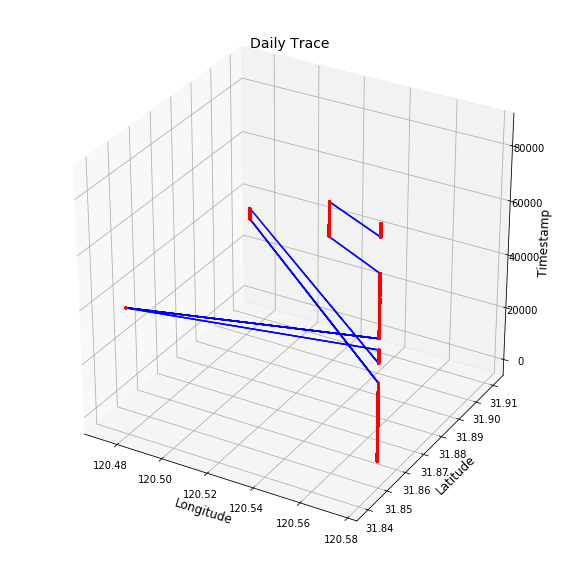

In [118]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d',facecolor='white')
stop = trace[trace.stop == 1]
trip = trace[trace.stop == 0]
ax.scatter(trip.lon, trip.lat, trip.num, marker='.',c='b',s=1)
ax.scatter(stop.lon, stop.lat, stop.num, marker='.',c='r',s=10)
ax.set_xlabel('Longitude',fontsize=12)
ax.set_ylabel('Latitude',fontsize=12)
ax.set_zlabel('Timestamp',fontsize=12)
# ax.set_zticks(np.linspace(0,24*3600,9),['0:00','3:00','6:00','9:00','12:00','15:00','18:00','21:00','24:00'])
ax.set_title('Daily Trace',fontsize=14)
# plt.xlim([trace.loc[trace.lon>0,'lon'].min(),trace.lon.max()])
# plt.ylim([trace.loc[trace.lat>0,'lat'].min(),trace.lat.max()])
# plt.zlim()
plt.savefig(dpi=300,fname='C:\\Users\\Administrator\\Desktop\\1.png',bbox_inches='tight',pad_inches=0)

In [116]:
user.to_csv('E:\\zy城市群数据分析\\190424手机数据整理\\uid_20_data_25_phone.csv',index=False,encoding='utf-8')
trace.to_csv('E:\\zy城市群数据分析\\190424手机数据整理\\uid_20_data_25_trace.csv',index=False,encoding='utf-8')